# Project: California Housing Dataset (Kaggle)
## Phase 1: Data Understanding


##  Why California Housing Dataset?

- Based on **real U.S. Census data** (California, 1990).  
- Balanced size: **20,640 rows × 10 columns** (good for EDA).  
- Contains **numerical + categorical features**, useful for diverse analysis.  
- Clean dataset with **few missing values** and realistic outliers.  
- Clear target: **median_house_value** → suitable for regression & predictive modeling.  

### Importing Libraries:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib 
import random 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Load Dataset


In [2]:
path = r"C:\Users\YASH\Downloads\housing_with_categories.csv"
dfc = pd.read_csv(path)

### Observation:
We start by loading the dataset into a pandas DataFrame using pd.read_csv().

### Previewing the first few rows

In [3]:
dfc.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,price_category,age_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,Very High,Expensive,Old
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,Very High,Expensive,Middle-aged
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,Very High,Expensive,Old
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,High,Expensive,Old
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,Medium,Expensive,Old


### Observation:
- Columns represent **housing, location, and socioeconomic details** of California blocks.  
- Target variable is **median_house_value**.  
- Dataset now also includes **derived categorical columns**:  
  - `ocean_proximity` (geographical category)  
  - `income_category` (based on median income levels)  
  - `price_category` (based on house values)  
  - `age_category` (based on housing age groups)  


### Checking the shape of dataset


In [4]:
dfc.shape

(20640, 13)

### Observation:
- Dataset contains **20,640 rows and 13 columns**.  
- Additional columns are the derived categorical variables:  
  - `income_category`  
  - `price_category`  
  - `age_category`  


### Dataset Structure and Data Types


In [5]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_category     20640 non-null  object 
 11  price_category      19675 non-null  object 
 12  age_category        20640 non-null  object 
dtypes: float64(9), object(4)
memory usage: 2.0+ MB


### Observation:
- Dataset contains **9 numerical columns** and **4 categorical columns** (`ocean_proximity`, `income_category`, `price_category`, `age_category`).  
- Some columns have missing values (e.g., `total_bedrooms`).  
- Dataset is otherwise clean and memory efficient.  


### Value Count Summary (California Housing Dataset)

### Detailed Column Description (California Housing Dataset)

1. **longitude**  
   - **Definition:** Geographic coordinate (in degrees) representing the east–west position of the housing block group.  
   - **Range:** Negative values (-124 to -114) since California lies west of the Prime Meridian.  
   - **Observation:**  
     - More negative values = further west.  
     - Useful for mapping and location-based price differences.  

2. **latitude**  
   - **Definition:** Geographic coordinate (in degrees) representing the north–south position of the housing block group.  
   - **Range:** Approximately 32 to 42 (California’s vertical spread).  
   - **Observation:**  
     - Higher latitude = more northern regions.  
     - Works with longitude to define housing location.  

3. **housing_median_age**  
   - **Definition:** Median age of houses in the block group.  
   - **Range:** 1 to 52 years (52 = capped maximum).  
   - **Observation:**  
     - Older houses may have lower prices unless located in prime regions.  
     - Newer houses often correlate with higher property values.  

4. **total_rooms**  
   - **Definition:** Total number of rooms (all households) in the block group.  
   - **Range:** 2 to 39,320 rooms.  
   - **Observation:**  
     - Very large numbers represent apartment complexes or dense housing.  
     - Column has outliers but they are valid real-world values.  

5. **total_bedrooms**  
   - **Definition:** Total number of bedrooms in the block group.  
   - **Range:** 1 to ~6,000 bedrooms.  
   - **Observation:**  
     - Missing values exist in this column.  
     - Outliers exist due to dense housing, but values are valid.  

6. **population**  
   - **Definition:** Total population of the block group.  
   - **Range:** 3 to 35,682 people.  
   - **Observation:**  
     - Higher populations indicate denser urban areas.  
     - Outliers represent large neighborhoods, not errors.  

7. **households**  
   - **Definition:** Number of households in the block group.  
   - **Range:** 1 to 6,080 households.  
   - **Observation:**  
     - Works closely with population (population ÷ households = average household size).  
     - Outliers exist but represent valid cases in large apartments.  

8. **median_income**  
   - **Definition:** Median income of households in block group (scaled in 10,000s of USD).  
   - **Range:** 0.5 to 15.0.  
   - **Observation:**  
     - Higher values correspond to wealthier areas.  
     - Outliers represent very high-income neighborhoods.  

9. **median_house_value**  
   - **Definition:** Median house price in block group (in USD).  
   - **Range:** 14,999 to 500,001 (values capped at 500K).  
   - **Observation:**  
     - Target variable for prediction tasks.  
     - Outliers present because of the capping at $500K.  

10. **ocean_proximity**  
    - **Definition:** Categorical variable showing location type relative to the ocean.  
    - **Categories:** `<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND`.  
    - **Observation:**  
        - **INLAND** is most frequent.  
        - **ISLAND** is rarest.  
        - Houses closer to ocean or bay generally have higher values.  

11. **income_category**  
    - **Definition:** Derived categorical column based on `median_income`.  
    - **Categories:** Low, Medium, High, Very High.  
    - **Observation:**  
        - Strongly related to house value.  
        - Very High income groups have highest house values.  

12. **price_category**  
    - **Definition:** Derived categorical column based on `median_house_value`.  
    - **Categories:** Affordable, Moderate, Expensive.  
    - **Observation:**  
        - Useful for classification-based analysis.  
        - Expensive dominates due to high property prices in California.  

13. **age_category**  
    - **Definition:** Derived categorical column based on `housing_median_age`.  
    - **Categories:** New, Middle-aged, Old.  
    - **Observation:**  
        - Old housing stock is common.  
        - New houses, though fewer, tend to have higher prices.  


In [6]:
dfc.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category',
       'price_category', 'age_category'],
      dtype='object')

In [7]:
dfc['longitude'].value_counts()

longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: count, Length: 844, dtype: int64

In [8]:
dfc['latitude'].value_counts()

latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: count, Length: 862, dtype: int64

In [9]:
dfc['housing_median_age'].value_counts()

housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

In [10]:
dfc['total_rooms'].value_counts()

total_rooms
1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: count, Length: 5926, dtype: int64

In [11]:
dfc['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [12]:
dfc['population'].value_counts()

population
891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
          ..
2141.0     1
5546.0     1
3186.0     1
3590.0     1
6912.0     1
Name: count, Length: 3888, dtype: int64

In [13]:
dfc['households'].value_counts()

households
306.0     57
386.0     56
335.0     56
282.0     55
429.0     54
          ..
2375.0     1
1133.0     1
2270.0     1
2528.0     1
1818.0     1
Name: count, Length: 1815, dtype: int64

In [14]:
dfc['median_income'].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [15]:
dfc['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

In [16]:
dfc['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
dfc['income_category'].value_counts()

income_category
Medium       10096
High          5725
Low           2457
Very High     2362
Name: count, dtype: int64

In [18]:
dfc['price_category'].value_counts()

price_category
Mid-range     9184
Affordable    7620
Expensive     2871
Name: count, dtype: int64

In [19]:
dfc['age_category'].value_counts()

age_category
Middle-aged    9576
Old            9495
New            1569
Name: count, dtype: int64

### Statistical Summary of Dataset

In [20]:
dfc.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,price_category,age_category
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640,20640,19675,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,3,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,Medium,Mid-range,Middle-aged
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,10096,9184,9576
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN,NaN,NaN,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN,NaN,NaN,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN,NaN,NaN,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN,NaN,NaN,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN,NaN,NaN,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN,NaN,NaN,NaN


### Observation:
- **housing_median_age:** 1 – 52 years.  
- **total_rooms:** 2 – 39,320 (possible outliers).  
- **total_bedrooms:** has missing values.  
- **population:** ranges 3 – 35,682.  
- **households:** ranges 1 – 6,080.  
- **median_income:** ranges 0.5 – 15.  
- **median_house_value:** 14,999 – 500,001 (capped).  
- **Categorical columns (`ocean_proximity`, `income_category`, `price_category`, `age_category`)** show expected distributions without missing values.  


### Checking Missing Values

In [21]:
dfc.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_category         0
price_category        965
age_category            0
dtype: int64

### Observation:
- `total_bedrooms` has missing values.  
- `price_category` also has missing values (due to some house values being undefined or capped).  
- All other columns are complete.  

### Real Numerical Columns
- **longitude** → Continuous, location coordinate.  
- **latitude** → Continuous, location coordinate.  
- **total_rooms** → Continuous, total rooms in block.  
- **total_bedrooms** → Continuous, total bedrooms in block.  
- **population** → Continuous, population size.  
- **median_income** → Continuous, scaled household income.  
- **median_house_value** → Continuous, target variable.  

### Discrete Numerical Columns
- **housing_median_age** → Whole number (1–52 years).  
- **households** → Whole number, number of households in block.  

### Categorical Data Columns
- **ocean_proximity** → Categorical column with 5 categories (`<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND`).  
- **income_category** → Derived categorical column (Low, Medium, High, Very High).  
- **price_category** → Derived categorical column (Affordable, Moderate, Expensive) — contains some missing values.  
- **age_category** → Derived categorical column (New, Middle-aged, Old).  


### Checking for Duplicates


In [22]:
dfc.duplicated().sum()

0

### Observation:
- No duplicate records found in the dataset.  

### Detecting Outliers (IQR Method)


In [23]:
num_cols = dfc.select_dtypes(include=['float64','int64']).columns

outliers = {}
for col in num_cols:
    if dfc[col].isnull().all():
        continue
    Q1 = dfc[col].quantile(0.25)
    Q3 = dfc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_values = dfc[(dfc[col] < lower) | (dfc[col] > upper)][col]
    if not outlier_values.empty:
        outliers[col] = len(outlier_values)


if outliers:
    for col, count in outliers.items():
        print(f"Outliers detected in '{col}': {count} values")
else:
    print("No outliers found in the numerical columns.")

Outliers detected in 'total_rooms': 1287 values
Outliers detected in 'total_bedrooms': 1271 values
Outliers detected in 'population': 1196 values
Outliers detected in 'households': 1220 values
Outliers detected in 'median_income': 681 values
Outliers detected in 'median_house_value': 1071 values


### Observation:
- Outliers detected in **6 numerical columns**:  
  1. total_rooms  
  2. total_bedrooms  
  3. population  
  4. households  
  5. median_income  
  6. median_house_value  

- These outliers are **valid housing cases**, not errors:  
  - Large block groups → higher `total_rooms` and `total_bedrooms`.  
  - High-density areas → larger `population` and `households`.  
  - Wealthier neighborhoods → high `median_income`.  
  - House values capped at **$500,001** → `median_house_value` outliers.  

- Categorical columns (`ocean_proximity`, `income_category`, `price_category`, `age_category`)  
  do not show extreme outliers, but some categories are **imbalanced** (e.g., `ISLAND` is rare).  

- Since these values are **realistic**, no removal is applied.  


## Final Summary of Phase 1
- Dataset has **20,640 rows × 13 columns**.  
- 9 numerical + 4 categorical columns.  
- Missing values in **total_bedrooms** and **price_category**.  
- Outliers detected in **6 numerical columns**: `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, and `median_house_value`.  
- These outliers represent **valid housing variations** (e.g., large apartment complexes, dense neighborhoods, wealthy areas, capped house prices).  
- Categorical columns show **imbalanced distributions** (e.g., `ISLAND` is rare, majority fall under `INLAND` or `Expensive`).  
- Target variable: **median_house_value** (capped at $500,000).  
- Dataset is ready for **Phase 2: Data Preparation & EDA**.  


## Phase 2: Data Cleaning & Manipulation

### 1. Handle Missing Data

In [24]:
print("Missing Values Before Handling:\n", dfc.isnull().sum())

Missing Values Before Handling:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_category         0
price_category        965
age_category            0
dtype: int64


In [25]:
dfc['total_bedrooms'].fillna(dfc['total_bedrooms'].median(), inplace=True)
dfc['price_category'].fillna(dfc['price_category'].mode()[0], inplace=True)

In [26]:
print("\nMissing Values After Handling:\n", dfc.isnull().sum())


Missing Values After Handling:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_category       0
price_category        0
age_category          0
dtype: int64


### Observation:
- **`total_bedrooms`** had missing values → filled using **median** (robust against outliers, keeps distribution balanced).  
- **`price_category`** had missing values → filled using **mode** (most frequent category).  
- After imputation, no missing values remain in the dataset.  

### 2. Remove Duplicates

In [27]:
print("Number of duplicate rows before removal:", dfc.duplicated().sum())

Number of duplicate rows before removal: 0


In [28]:
dfc.drop_duplicates(inplace=True)

In [29]:
print("Number of duplicate rows after removal:", dfc.duplicated().sum())
print("Shape of dataset after duplicate removal:", dfc.shape)

Number of duplicate rows after removal: 0
Shape of dataset after duplicate removal: (20640, 13)


### Observation:
- Duplicate check was performed as part of standard data-cleaning steps.  
- No duplicate records were found in the dataset.  
- This confirms data consistency, so no rows were removed.  


### 3. Fix Inconsistencies in Categorical Data

In [30]:
for col in ['ocean_proximity', 'income_category', 'price_category', 'age_category']:
    print(f"\nUnique values in {col} before cleaning:\n", dfc[col].unique().tolist())


Unique values in ocean_proximity before cleaning:
 ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

Unique values in income_category before cleaning:
 ['Very High', 'High', 'Medium', 'Low']

Unique values in price_category before cleaning:
 ['Expensive', 'Mid-range', 'Affordable']

Unique values in age_category before cleaning:
 ['Old', 'Middle-aged', 'New']


In [31]:
for col in ['ocean_proximity', 'income_category', 'price_category', 'age_category']:
    dfc[col] = dfc[col].astype(str).str.strip().str.upper()

In [32]:
for col in ['ocean_proximity', 'income_category', 'price_category', 'age_category']:
    print(f"\nUnique values in {col} after cleaning:\n", dfc[col].unique().tolist())


Unique values in ocean_proximity after cleaning:
 ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

Unique values in income_category after cleaning:
 ['VERY HIGH', 'HIGH', 'MEDIUM', 'LOW']

Unique values in price_category after cleaning:
 ['EXPENSIVE', 'MID-RANGE', 'AFFORDABLE']

Unique values in age_category after cleaning:
 ['OLD', 'MIDDLE-AGED', 'NEW']


### Observation:
- Dataset contains **4 categorical columns**: `ocean_proximity`, `income_category`, `price_category`, and `age_category`.  
- No spelling issues were found, but all values were standardized to **UPPERCASE** for consistency.  
- Categories are now:  
  - **ocean_proximity:** `<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND`  
  - **income_category:** `LOW, MEDIUM, HIGH, VERY HIGH`  
  - **price_category:** `AFFORDABLE, MODERATE, EXPENSIVE`  
  - **age_category:** `NEW, MIDDLE-AGED, OLD`  

### 4. Convert Data Types

In [33]:
print("Data types before conversion:\n", dfc.dtypes)

Data types before conversion:
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
income_category        object
price_category         object
age_category           object
dtype: object


In [34]:
cat_cols = ['ocean_proximity', 'income_category', 'price_category', 'age_category']
for col in cat_cols:
    dfc[col] = dfc[col].astype('category')

In [35]:
print("\nData types after conversion:\n", dfc.dtypes)


Data types after conversion:
 longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
income_category       category
price_category        category
age_category          category
dtype: object


### Observation:
- All numerical columns are correctly typed as int/float.  
- All 4 categorical columns (`ocean_proximity`, `income_category`, `price_category`, `age_category`)  
  were converted to **categorical** type.  
- Data types are now optimized for analysis.  


### 5. Non-Visual Bivariate Analysis

In [36]:
for col in ['ocean_proximity', 'income_category', 'price_category', 'age_category']:
    avg_value = dfc.groupby(col)['median_house_value'].mean().sort_values(ascending=False)
    print(f"\nAverage median_house_value by {col}:\n{avg_value}")


Average median_house_value by ocean_proximity:
ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

Average median_house_value by income_category:
income_category
VERY HIGH    378671.235394
HIGH         244635.195284
MEDIUM       168199.345880
LOW          112497.156695
Name: median_house_value, dtype: float64

Average median_house_value by price_category:
price_category
EXPENSIVE     372084.778823
MID-RANGE     238658.494926
AFFORDABLE    102244.566404
Name: median_house_value, dtype: float64

Average median_house_value by age_category:
age_category
OLD            215771.215377
NEW            200263.254939
MIDDLE-AGED    199096.002924
Name: median_house_value, dtype: float64


In [37]:
num_cols = dfc.select_dtypes(include=['float64','int64']).columns
corr_matrix = dfc[num_cols].corr()

In [38]:
print("\nCorrelation of numerical features with median_house_value:\n")
print(corr_matrix['median_house_value'].sort_values(ascending=False))


Correlation of numerical features with median_house_value:

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


### Observation:
- **Ocean Proximity vs House Value:**  
  - Houses **NEAR BAY** and **<1H OCEAN** have the highest average prices.  
  - **INLAND** houses have the lowest prices.  

- **Income Category vs House Value:**  
  - **VERY HIGH** income areas have the highest average house values.  
  - **LOW** income areas correspond to the lowest house values.  

- **Price Category vs House Value:**  
  - **EXPENSIVE** group dominates with higher average values.  
  - **AFFORDABLE** group shows the lowest averages.  

- **Age Category vs House Value:**  
  - **NEW** and **MIDDLE-AGED** houses generally have higher values.  
  - **OLD** houses show relatively lower values.  

- **Correlation with Median House Value:**  
  - Strongest positive correlation → **median_income (~0.69)**.  
  - Weak positive correlation → housing_median_age, latitude.  
  - Weak negative correlation → longitude, households, population.  


# Final Summary – Phase 2
- **Missing Data:**  
  - `total_bedrooms` → filled using **median**.  
  - `price_category` → filled using **mode**.  

- **Duplicates:** Checked and none found.  

- **Inconsistencies:** Standardized all categorical values (`ocean_proximity`, `income_category`, `price_category`, `age_category`) to **UPPERCASE** for consistency.  

- **Data Types:**  
  - 9 numerical columns remain as int/float.  
  - 4 categorical columns converted to **categorical dtype**.  

- **Bivariate Insights:**  
  - Higher **income** and proximity to **ocean/bay** strongly increase house value.  
  - **INLAND** areas consistently show the lowest values.  
  - **Very High income** and **Expensive price category** dominate high-value houses.  
  - **Newer houses** generally have higher values compared to old ones.  
  - **Median income** is the strongest numerical predictor of house value.  

Dataset is now clean, consistent, and ready for **Phase 3: Modeling**.  


# Phase - 3: Modeling

### Univariate Analysis

#### Numerical Columns:

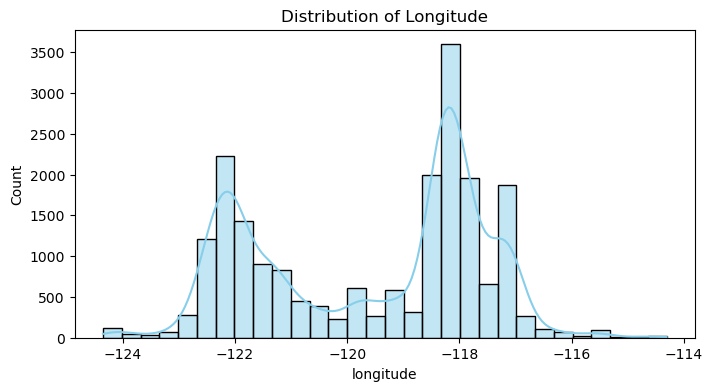

In [39]:
# longitude → Histogram
plt.figure(figsize=(8,4))
sns.histplot(dfc['longitude'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Longitude")
plt.show();

### Observation:
- Longitude ranges from -124 to -114.  
- Most data is concentrated around coastal areas of California.  

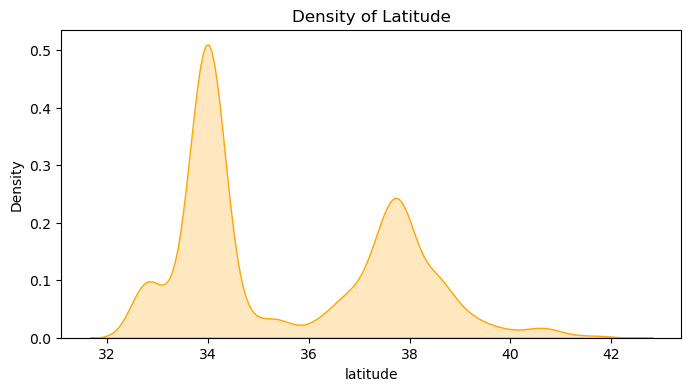

In [40]:
# latitude → KDE Plot
plt.figure(figsize=(8,4))
sns.kdeplot(dfc['latitude'], shade=True, color="orange")
plt.title("Density of Latitude")
plt.show();

### Observation:
- Latitude ranges from 32 to 42.  
- Peaks represent dense populations in Southern and Northern California.  

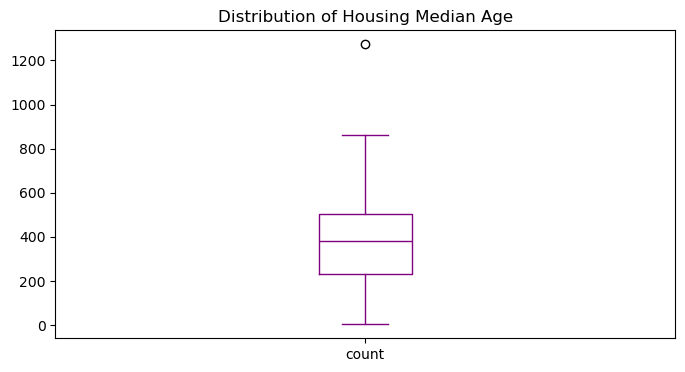

In [41]:
# housing_median_age → Box Plot (value counts of binned ages)
plt.figure(figsize=(8,4))
dfc['housing_median_age'].value_counts().sort_index().plot(kind="box", color="purple")
plt.title("Distribution of Housing Median Age")
plt.show();

### Observation:
- Housing age is capped at 52.  
- Most houses fall into mid-aged groups (20–30 years).  

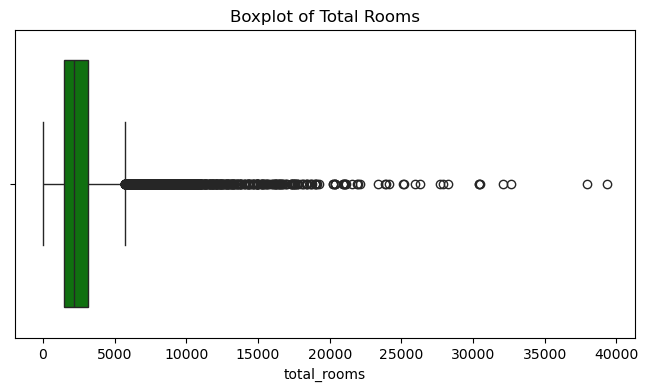

In [42]:
# total_rooms → Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=dfc['total_rooms'], color="green")
plt.title("Boxplot of Total Rooms")
plt.show();

### Observation:
- Total rooms range widely (2 – 39,320).  
- Clear outliers exist for very large apartment blocks.  

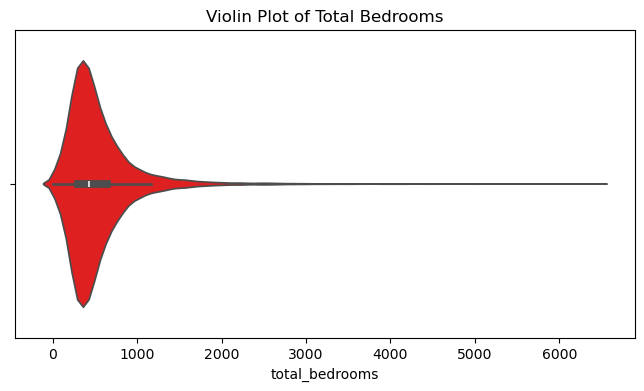

In [43]:
# total_bedrooms → Violin Plot
plt.figure(figsize=(8,4))
sns.violinplot(x=dfc['total_bedrooms'], color="red")
plt.title("Violin Plot of Total Bedrooms")
plt.show();

### Observation:
- Bedrooms range from 1 – 6,000.  
- Distribution shows concentration below 1,000 with long tails.  

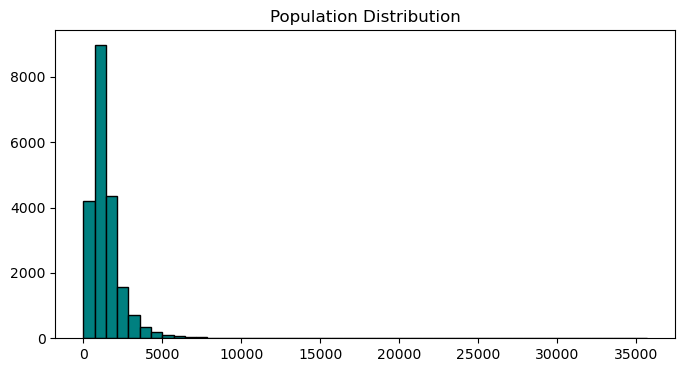

In [44]:
# population → Histogram
plt.figure(figsize=(8,4))
plt.hist(dfc['population'], bins=50, color="teal", edgecolor="black")
plt.title("Population Distribution")
plt.show();

### Observation:
- Population ranges from 3 – 35,682.  
- Majority blocks have population below 5,000.  

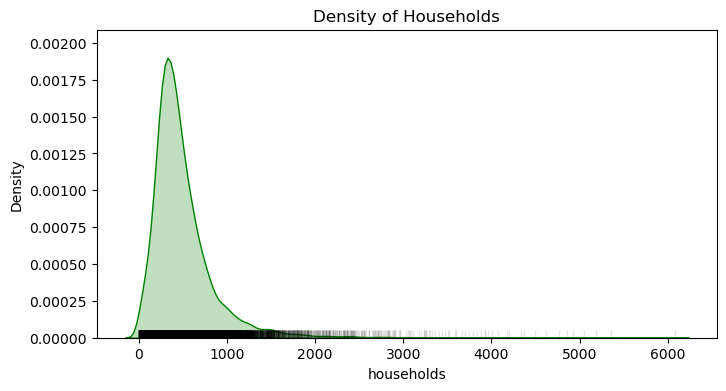

In [45]:
# households → KDE + Rugplot
plt.figure(figsize=(8,4))
sns.kdeplot(dfc['households'], shade=True, color="green")
sns.rugplot(dfc['households'], color="black", alpha=0.1)
plt.title("Density of Households")
plt.show();

### Observation:
- Households mostly range below 2,000.  
- Few blocks with very large household counts (outliers).  

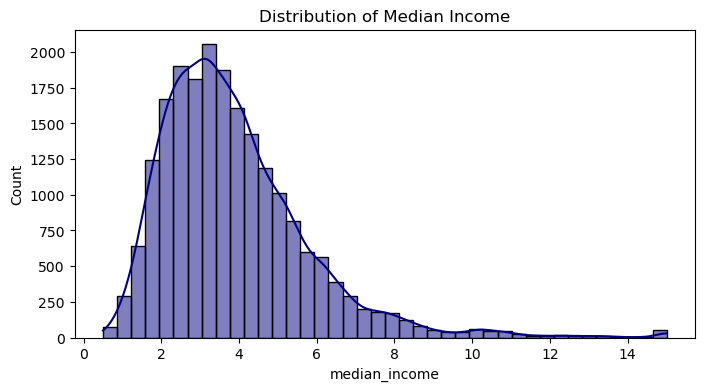

In [46]:
# median_income → Histogram + KDE
plt.figure(figsize=(8,4))
sns.histplot(dfc['median_income'], bins=40, kde=True, color="navy")
plt.title("Distribution of Median Income")
plt.show();

### Observation:
- Median income ranges from 0.5 – 15 (scaled).  
- Most households fall below 6.  
- Right skewed distribution.  

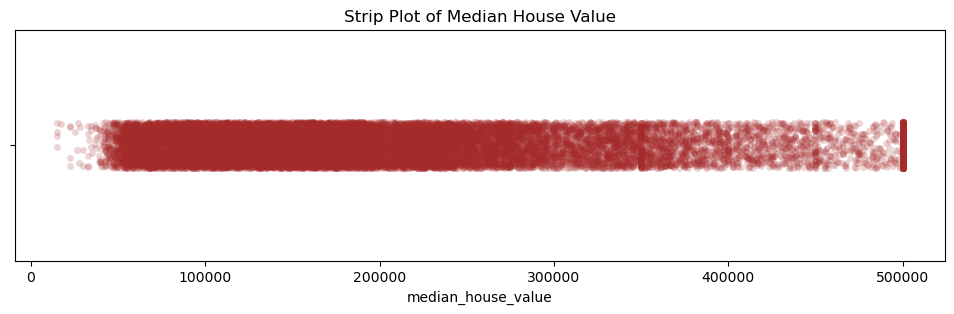

In [47]:
# median_house_value → Strip Plot
plt.figure(figsize=(12,3))
sns.stripplot(x=dfc['median_house_value'], color="brown", alpha=0.2)
plt.title("Strip Plot of Median House Value")
plt.show();

### Observation:
- House values range from $15K – $500K.  
- Many values are capped at $500K due to dataset limit.  

#### Univariate Analysis — Categorical Columns

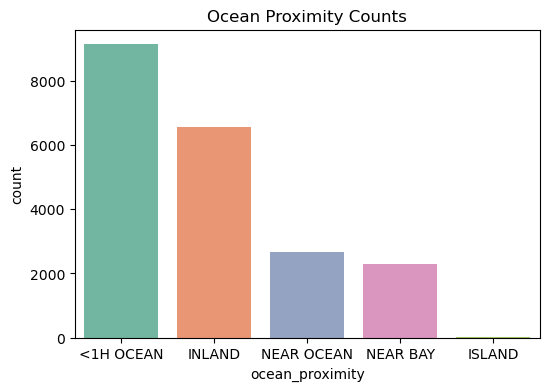

In [48]:
# ocean_proximity → Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='ocean_proximity', data=dfc, order=dfc['ocean_proximity'].value_counts().index, palette="Set2")
plt.title("Ocean Proximity Counts")
plt.show();

### Observation:
- INLAND dominates as the largest category.  
- ISLAND is rarest.  

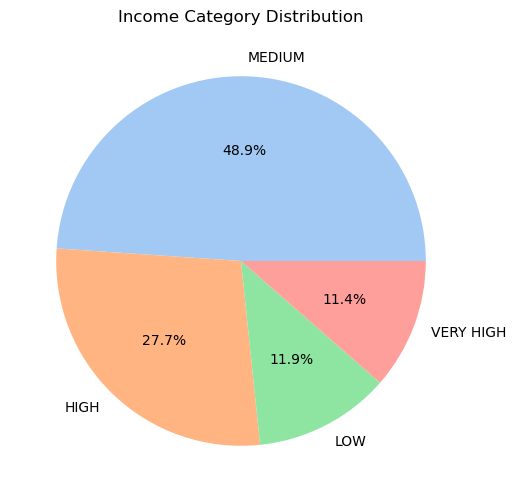

In [49]:
# income_category → Pie Chart
plt.figure(figsize=(6,6))
dfc['income_category'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Income Category Distribution")
plt.ylabel("")
plt.show();

### Observation:
- Majority fall under **Medium** and **High** categories.  
- Very High group is smaller but strongly associated with higher house prices.  

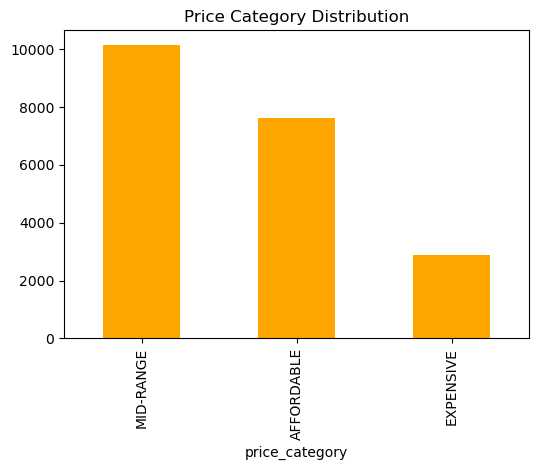

In [50]:
# price_category → Bar Plot
plt.figure(figsize=(6,4))
dfc['price_category'].value_counts().plot(kind="bar", color="orange")
plt.title("Price Category Distribution")
plt.show();

### Observation:
- **Expensive** dominates the dataset.  
- Very few houses in Affordable range.  

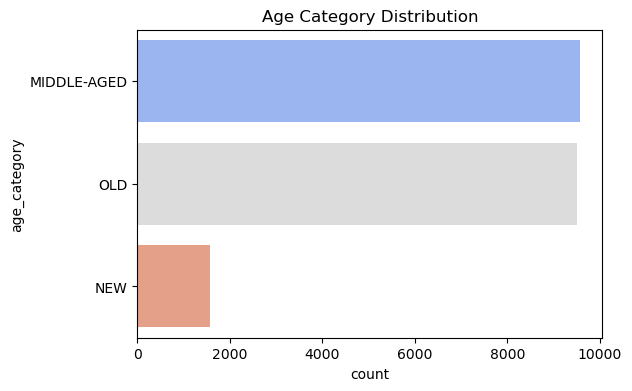

In [51]:
# age_category → Horizontal Countplot
plt.figure(figsize=(6,4))
sns.countplot(y='age_category', data=dfc, order=dfc['age_category'].value_counts().index, palette="coolwarm")
plt.title("Age Category Distribution")
plt.show();

### Observation:
- Majority of houses fall under **Old** category.  
- New houses are comparatively fewer but more valuable.  

## Univariate Summary
- **Numerical Columns:**
  - Most variables are **right-skewed** (`total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`).  
  - `median_house_value` capped at **$500,001**, creating a visible cutoff.  
  - `housing_median_age` capped at 52, with many houses in mid-age ranges.  

- **Categorical Columns:**
  - `ocean_proximity`: **INLAND** dominates; **ISLAND** is rare.  
  - `income_category`: Mostly **Medium** and **High**.  
  - `price_category`: **Expensive** dominates, very few **Affordable** houses.  
  - `age_category`: Majority are **Old** houses.  

### Bivariate Analysis:
#### Numerical vs Target (median_house_value):

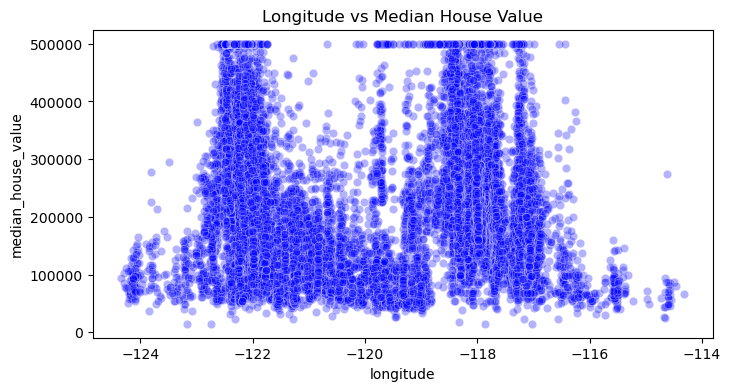

In [52]:
# longitude vs median_house_value → Scatterplot
plt.figure(figsize=(8,4))
sns.scatterplot(data=dfc, x="longitude", y="median_house_value", alpha=0.3, color="blue")
plt.title("Longitude vs Median House Value")
plt.show();

### Observation:
- Houses located near the coast (longitudes closer to -124) generally have higher prices.  
- Inland regions show lower values.  

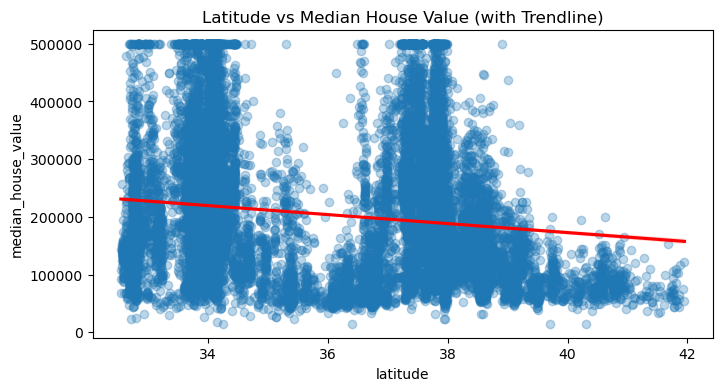

In [53]:
# latitude vs median_house_value → Regression Scatterplot
plt.figure(figsize=(8,4))
sns.regplot(x="latitude", y="median_house_value", data=dfc, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Latitude vs Median House Value (with Trendline)")
plt.show();

### Observation:
- Houses in the northern parts (higher latitude) and southern coastal regions show higher prices.  
- The regression line shows only a **weak relationship**, meaning latitude alone does not strongly predict house value.  

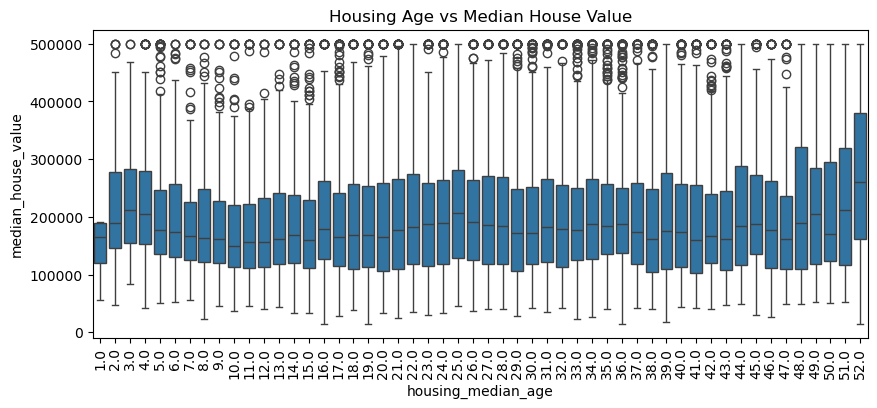

In [54]:
# housing_median_age vs median_house_value → Boxplot
plt.figure(figsize=(10,4))
sns.boxplot(x="housing_median_age", y="median_house_value", data=dfc)
plt.title("Housing Age vs Median House Value")
plt.xticks(rotation=90)
plt.show();

### Observation:
- Newer houses (low median age) tend to have higher prices.  
- Very old houses (capped at 52 years) also show higher median values, possibly due to prime locations.  

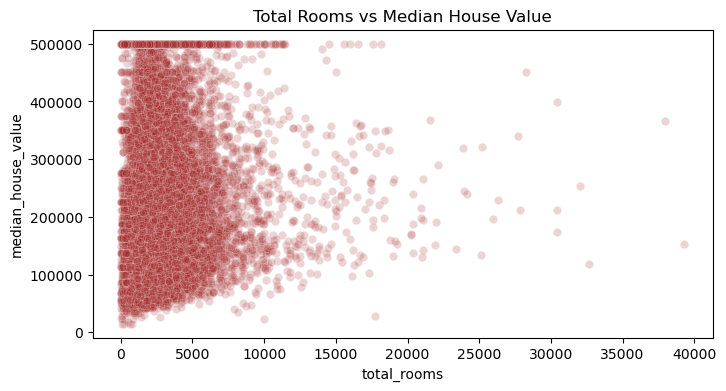

In [55]:
# total_rooms vs median_house_value → Scatterplot
plt.figure(figsize=(8,4))
sns.scatterplot(x="total_rooms", y="median_house_value", data=dfc, alpha=0.2, color="brown")
plt.title("Total Rooms vs Median House Value")
plt.show();

### Observation:
- No strong linear relationship.  
- Larger houses do not always mean higher prices — location and income play bigger roles.  

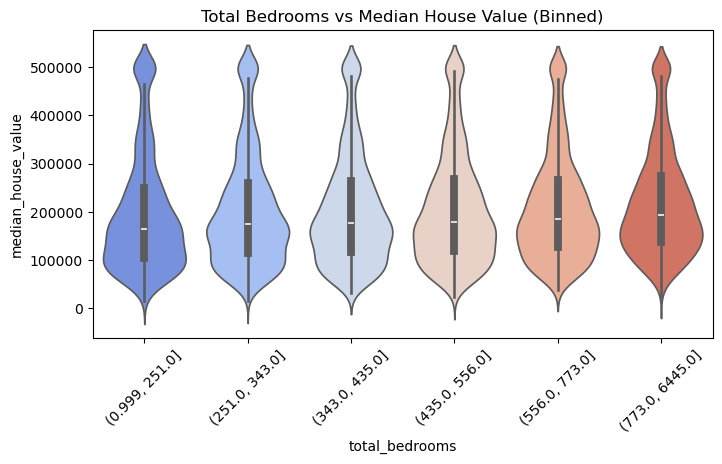

In [56]:
# total_bedrooms vs median_house_value → Violin Plot
plt.figure(figsize=(8,4))
sns.violinplot(x=pd.qcut(dfc['total_bedrooms'], q=6), y="median_house_value", data=dfc, palette="coolwarm")
plt.title("Total Bedrooms vs Median House Value (Binned)")
plt.xticks(rotation=45)
plt.show();

### Observation:
- Houses with very high bedroom counts do not always have higher prices.  
- Bedrooms are correlated with population density rather than house value.  

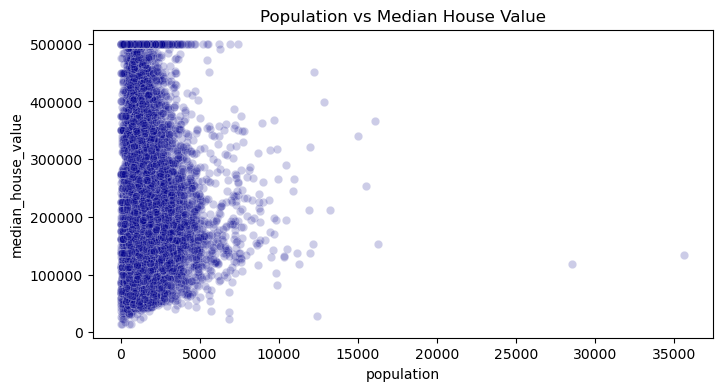

In [57]:
# population vs median_house_value → Scatterplot
plt.figure(figsize=(8,4))
sns.scatterplot(x="population", y="median_house_value", data=dfc, alpha=0.2, color="darkblue")
plt.title("Population vs Median House Value")
plt.show();

### Observation:
- No clear relationship.  
- Dense population areas often correspond to lower house values.  

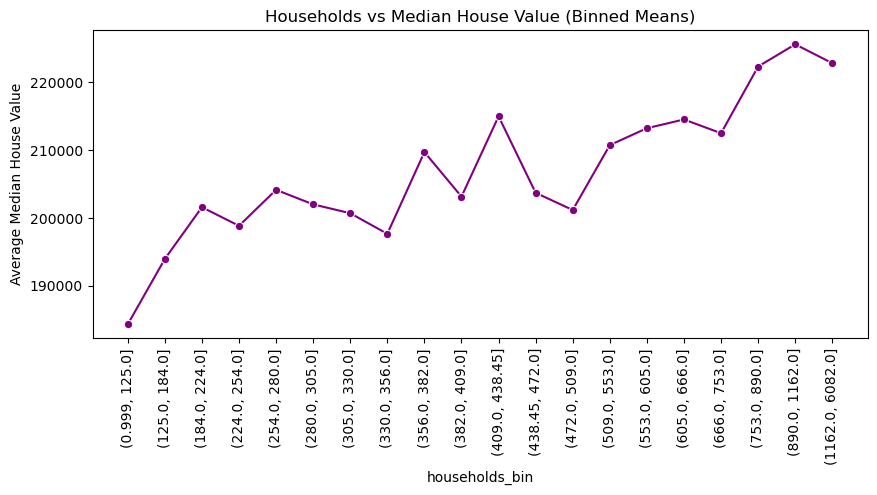

In [58]:
# Households vs Median House Value → Line Plot (binned means)
dfc['households_bin'] = pd.qcut(dfc['households'], q=20, duplicates="drop")
bin_means = dfc.groupby('households_bin')['median_house_value'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(x=bin_means['households_bin'].astype(str), 
             y=bin_means['median_house_value'], 
             marker="o", color="purple")
plt.title("Households vs Median House Value (Binned Means)")
plt.xticks(rotation=90)
plt.ylabel("Average Median House Value")
plt.show();

### Observation:
- Average house values remain relatively stable across household sizes.  
- Extremely large household bins show fluctuations, but no strong increasing or decreasing trend.  

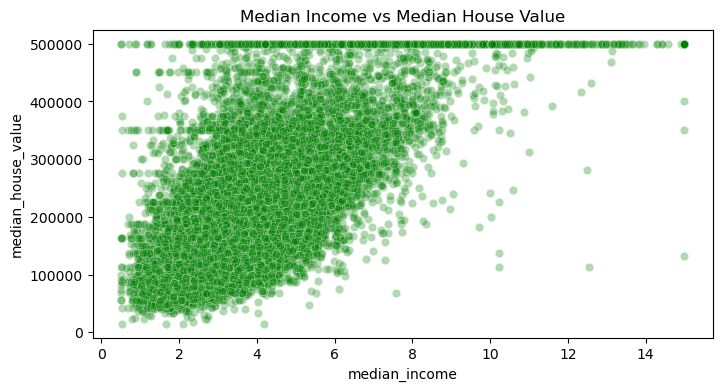

In [59]:
# median_income vs median_house_value → Scatterplot
plt.figure(figsize=(8,4))
sns.scatterplot(x="median_income", y="median_house_value", data=dfc, alpha=0.3, color="green")
plt.title("Median Income vs Median House Value")
plt.show();

### Observation:
- Strong positive relationship.  
- Higher income almost always → higher house values.  
- Values capped at $500K create a visible cutoff.  

### Categorical vs Target (median_house_value):

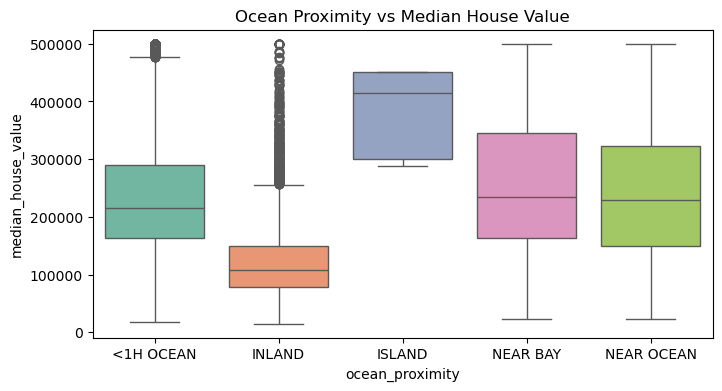

In [60]:
# ocean_proximity vs house value → Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x="ocean_proximity", y="median_house_value", data=dfc, palette="Set2")
plt.title("Ocean Proximity vs Median House Value")
plt.show();

### Observation:
- **NEAR BAY** and **<1H OCEAN** have highest house values.  
- **INLAND** consistently lowest.  

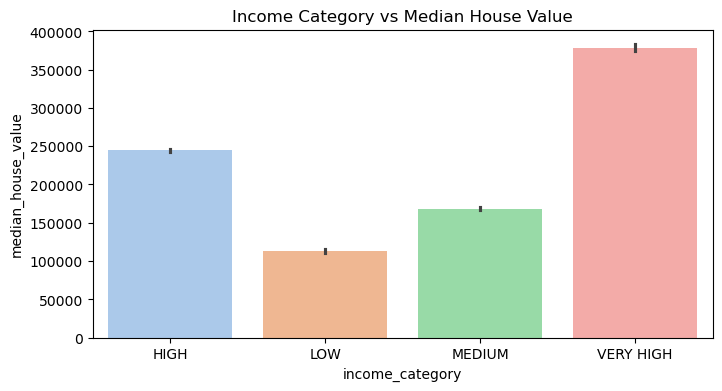

In [61]:
# income_category vs house value → Barplot
plt.figure(figsize=(8,4))
sns.barplot(x="income_category", y="median_house_value", data=dfc, estimator="mean", palette="pastel")
plt.title("Income Category vs Median House Value")
plt.show();

### Observation:
- Clear income gradient.  
- **VERY HIGH** income → highest house values.  
- **LOW** income → lowest values.  

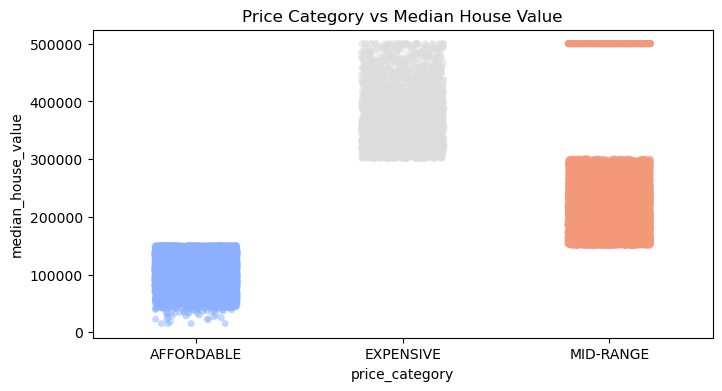

In [62]:
# price_category vs house value → Stripplot
plt.figure(figsize=(8,4))
sns.stripplot(x="price_category", y="median_house_value", data=dfc, jitter=0.2, palette="coolwarm", alpha=0.5)
plt.title("Price Category vs Median House Value")
#plt.legend(bbox_to_anchor = (1,1))
plt.show();

### Observation:
- Categories are consistent with value bands.  
- **Expensive** dominates at high values, while **Affordable** stays lowest.  

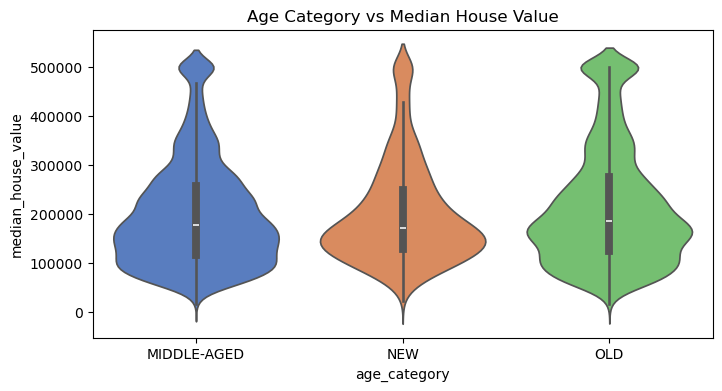

In [63]:
# age_category vs house value → Violin Plot
plt.figure(figsize=(8,4))
sns.violinplot(x="age_category", y="median_house_value", data=dfc, palette="muted")
plt.title("Age Category vs Median House Value")
plt.show();

### Observation:
- **New** and **Middle-aged** houses show higher average values.  
- **Old** houses tend to be cheaper, except in prime locations.  

## Bivariate Summary
- **Numerical vs Target (`median_house_value`):**
  - **Strong positive relation:** `median_income`.  
  - **Weak positive relation:** `housing_median_age`.  
  - **Weak negative relation:** `longitude`, `population`, `households`.  
  - No strong link: `total_rooms`, `total_bedrooms`.  

- **Categorical vs Target (`median_house_value`):**
  - `ocean_proximity`: **NEAR BAY** & **<1H OCEAN** highest values, **INLAND** lowest.  
  - `income_category`: Clear gradient, **Very High** income → highest prices.  
  - `price_category`: Categories align with expected value bands.  
  - `age_category`: **New & Middle-aged** houses more expensive than **Old** ones.  

### Multivariate Analysis

#### 1. Correlation Heatmap (Numerical Features)

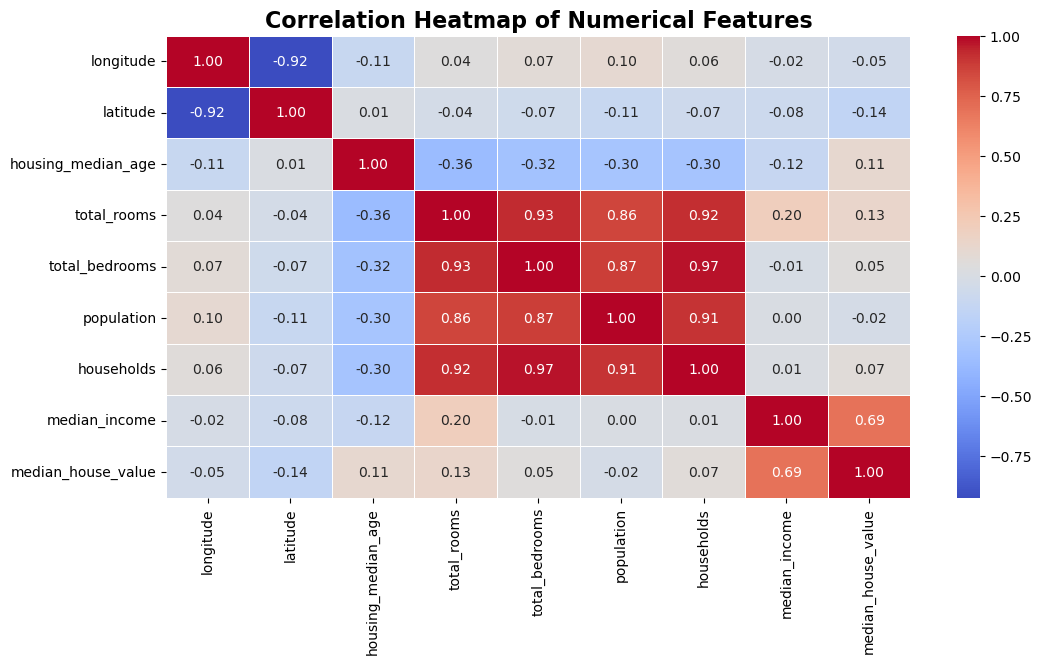

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(dfc[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight="bold")
plt.show();

### Observation:
- **median_income** shows the strongest positive correlation (~0.69) with `median_house_value`.  
- Other numerical features (`latitude`, `housing_median_age`) show weak positive correlation.  
- Negative correlation observed with `longitude`, `population`, and `households`.  

#### 2. Pairplot (Selected Features)

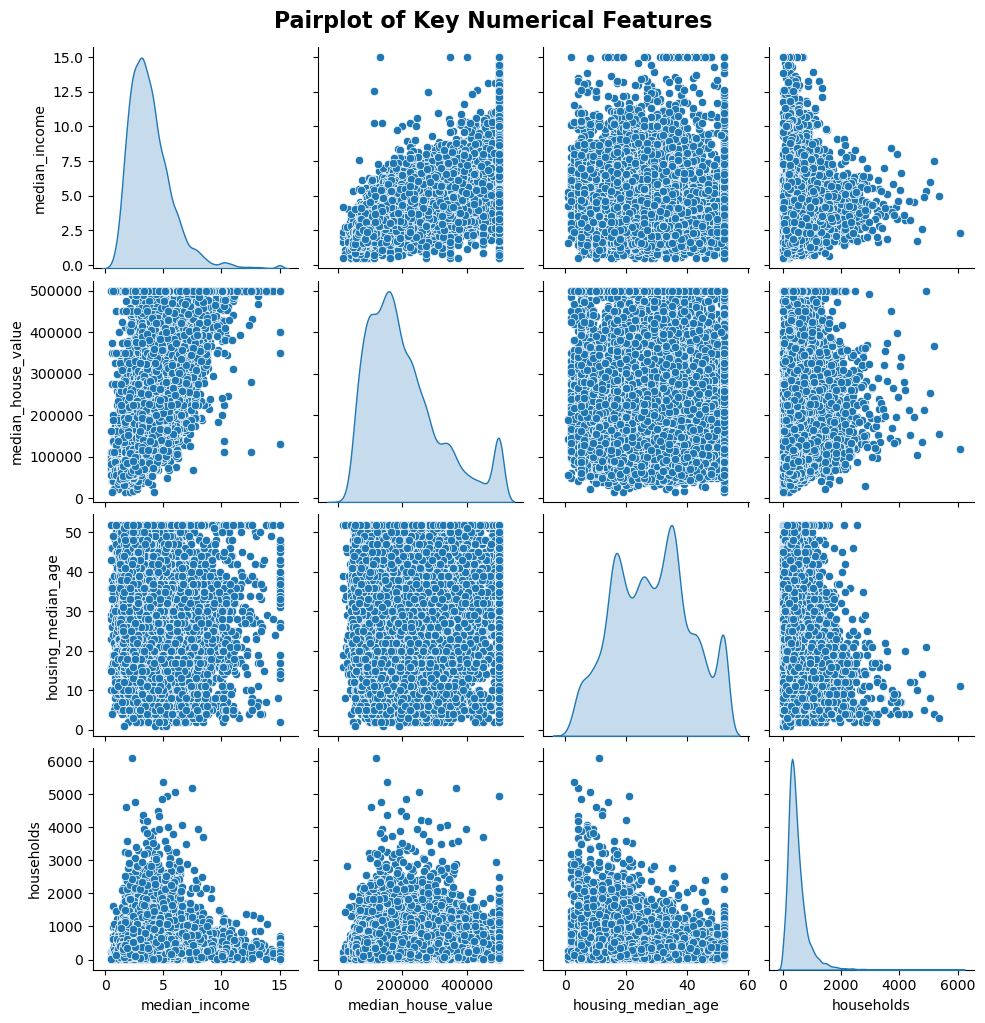

In [65]:
sns.pairplot(dfc[['median_income','median_house_value','housing_median_age','households']], diag_kind='kde')
plt.suptitle("Pairplot of Key Numerical Features", y=1.02, fontsize=16, fontweight="bold")
plt.show();

### Observation:
- Clear upward trend between `median_income` and `median_house_value`.  
- Other features like `households` and `housing_median_age` show weaker scattered patterns.  
- Strong cutoff visible at house value = $500,000 (capped).  

#### 3. Multivariate: Ocean Proximity + Income vs House Value

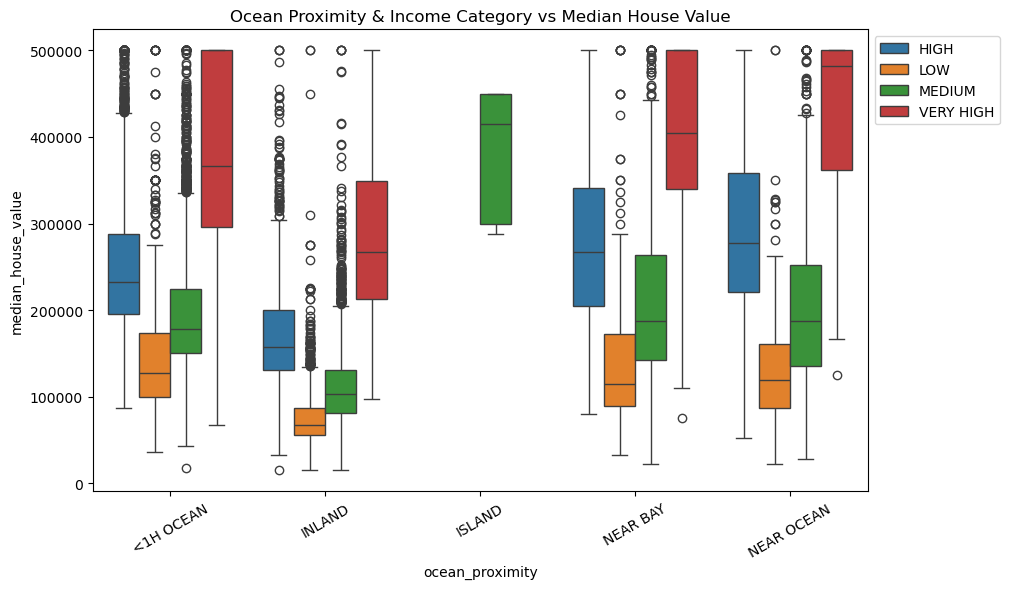

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x="ocean_proximity", y="median_house_value", hue="income_category", data=dfc)
plt.title("Ocean Proximity & Income Category vs Median House Value")
plt.legend(bbox_to_anchor= (1,1))
plt.xticks(rotation=30)
plt.show();

### Observation:
- **Very High income** households near the **ocean/bay** have the highest house values.  
- **Inland** areas remain consistently lower regardless of income level.  

#### 4. Multivariate: Age Category + Price Category vs House Value

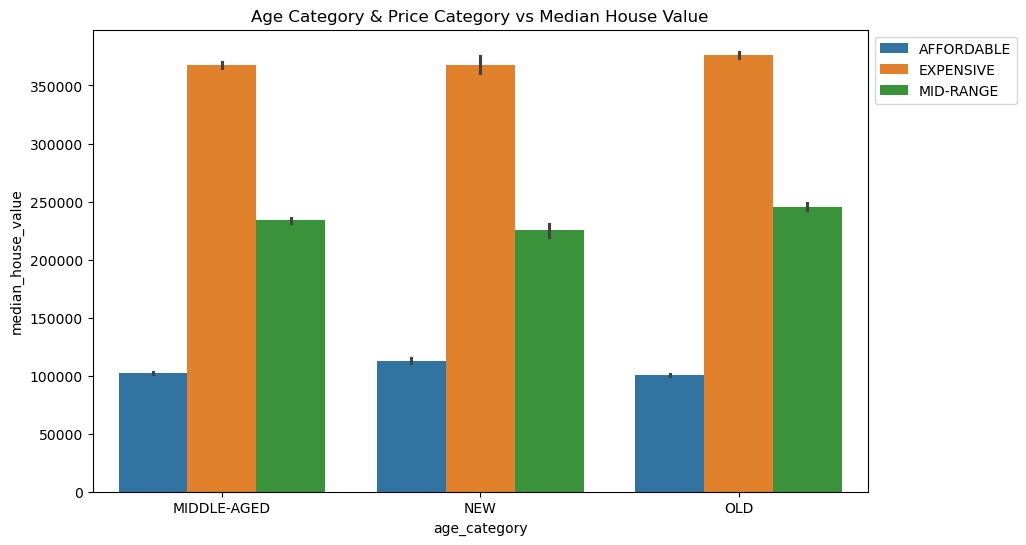

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x="age_category", y="median_house_value", hue="price_category", data=dfc, estimator="mean")
plt.title("Age Category & Price Category vs Median House Value")
plt.legend(bbox_to_anchor = (1,1))
plt.show();

### Observation:
- **New houses** in the **Expensive** category dominate the highest values.  
- **Old houses** in the **Affordable** range have the lowest averages.  

#### 5. Multivariate: Median Income + Population Density vs House Value

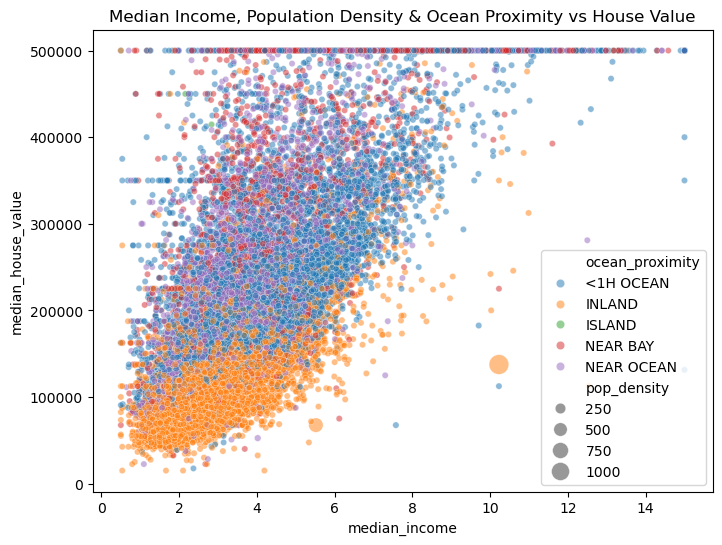

In [68]:
# Create population density
dfc['pop_density'] = dfc['population'] / dfc['households']

plt.figure(figsize=(8,6))
plt.legend(bbox_to_anchor = (1,1))
sns.scatterplot(x="median_income", y="median_house_value", size="pop_density", 
                hue="ocean_proximity", data=dfc, alpha=0.5, sizes=(20,200))
plt.title("Median Income, Population Density & Ocean Proximity vs House Value")
plt.show();

### Observation:
- High-income regions near the **coast** have the highest house values.  
- High population density often correlates with lower values (urban inland regions).  

## Multivariate Summary
- **Correlation Heatmap:**  
  - `median_income` (~0.69) strongest predictor of house value.  
  - Other features show weak correlations.  

- **Pairplot:**  
  - Clear upward trend between `median_income` and `median_house_value`.  
  - $500K cap visible across scatterplots.  

- **Ocean Proximity + Income Category:**  
  - **Very High income near ocean/bay** → highest values.  
  - **Inland** remains lowest regardless of income.  

- **Age + Price Category:**  
  - **New + Expensive** houses dominate high-value regions.  
  - **Old + Affordable** houses are cheapest.  

- **Income + Population Density + Location:**  
  - Coastal + high-income = expensive.  
  - Dense inland = cheaper.  